## Enrique Data
#### Adapted from the example Voyager notebook

#### Filterbank format 

*The .fil files come as a set of four files - containing all 32-bit values except as noted:*

- *.gpuspec.0000.fil : ~3Hz frequency bin resolution, ~18 second sample time (SETI)*
- *.gpuspec.0001.fil : ~366MHz frequency bin resolution, 349 us sample time (Pulsar)*
- *.gpuspec.0002.fil : ~3Khz frequency bin resolution, ~1 second sample time ("in between")*
- *.gpuspec.8.0000.fil : 8-bit version of the Pulsar product (current pulsar detection tools can only handle 8-bit data)* 

So, I need the **gpuspec.0001.fil** files.

Some filename conventions:

blcNN_guppi_MMMMM_SSSSS_TTTTT_XXXX.suffix

- NN : compute nodes or banks where the data was recorded (each two-digit NN represents 187.5 MHz of bandwidth)
- MMMMM : MJD (modified Julian date) of observation
- SSSSS : Seconds after midnight of observation
- TTTTT : Target name (may contain underscores)
- XXXX : sequence # (or #s) of observation (for bookkeeping)

In [1]:
import pylab as plt
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt
from blimpy import Waterfall
import PIL
import os
from scipy import ndimage, misc

%matplotlib inline

Note that many of the files available are [L band](https://en.wikipedia.org/wiki/Infrared_astronomy). In infrared astronomy, the L band is an atmospheric transmission window centred on 3.5 micrometres (in the mid-infrared).

#### One-off

Now, let's read the observation data using `Waterfall()`:

In [2]:
f_start = 1522.180016
#f_stop = 1522.181516
f_stop = f_start + 0.003 #units are MHz
t_start = 0 
t_stop = 16

In [22]:
#Check this out!!!

#https://seti.berkeley.edu/lband2017/landing.html

In [2]:
#Recall,
#0000 ... high frequency resolution
#0001 ... high time resolution
#0002 ... medium freq/time resolution

#voyager_0002 
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0002.fil')

#voyager_0001 
#filterbank_head = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0001.fil', load_data=False)
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0001.fil', f_start=8420, f_stop=8421)

#pulsar_0002
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/spliced_blc0001020304050607_guppi_57540_44265_DIAG_PSR_J2113+4644_0002.gpuspec.0002.fil')

#Hits of HIP20901 from publication website
filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP20901/spliced_blc0001020304050607_guppi_57606_50409_Hip19822_0028.gpuspec.0000.h5')

#Hits of HIP65352 from publication website
#filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP65352/HIP65352/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5')

#HIP65352 (Example Enrique data)
#filterbank_head = Waterfall('D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', load_data=False)

#f_start = 1522.180016
#f_stop = 1522.181516
#f_stop = f_start + 0.003 #units are MHz
#t_start = 0 
#t_stop = 16

#filterbank = Waterfall('D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop,max_load=1)

#HIP65352 extract of significant event
#filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP65352/HIP65352/spliced_blc02030405_2bit_guppi_57459_34623_HIP65352_OFF_0028.gpuspec.0000.h5')

In [3]:
filterbank.info()


--- File Info ---
 b'telescope_id' :                                6
        b'nbits' :                               32
         b'fch1' :                2251.464842353016
    b'data_type' :                                1
       b'nchans' :                        536870912
        b'tsamp' :                     18.253611008
         b'foff' :          -2.7939677238464355e-06
      b'src_raj' :                     4h15m01.056s
      b'src_dej' :                     15d44m15.36s
       b'tstart' :                    57606.5834375
     b'az_start' :                              0.0
  b'source_name' :                      b'Hip19822'
     b'za_start' :                              0.0
   b'machine_id' :                               20
         b'nifs' :                                1
b'DIMENSION_LABELS' : [b'frequency' b'feed_id' b'time']

Num ints in file :                               16
      File shape :                   (16, 1, 71583)
--- Selection Info ---
Data selection sh

In [5]:
print('Min freq: ' + str(filterbank_head.container.f_start))
print('Max freq: ' + str(filterbank_head.container.f_stop))

NameError: name 'filterbank_head' is not defined

In [5]:
np.max(filterbank.data)

19898405000.0

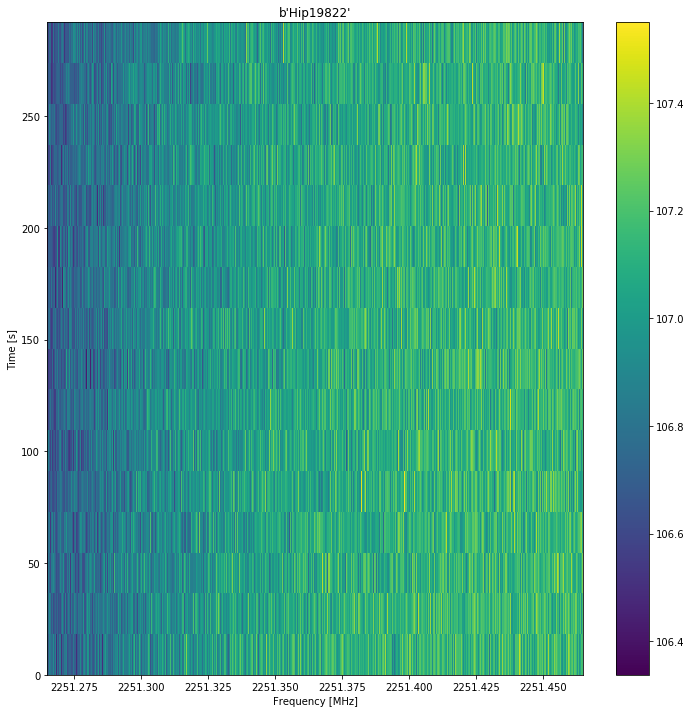

In [4]:
#https://github.com/UCBerkeleySETI/blimpy/blob/master/blimpy/waterfall.py
plt.figure(figsize=(12,12))
filterbank.plot_waterfall()

In [5]:
from scipy.stats import signaltonoise

ImportError: cannot import name 'signaltonoise'

In [100]:
#MAX_IMSHOW_POINTS = (8192, 4096)

#dec_fac_x, dec_fac_y = 1, 1

#if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
#    dec_fac_x = int(plot_data.shape[0] / MAX_IMSHOW_POINTS[0])

#if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
#    dec_fac_y =  int(plot_data.shape[1] /  MAX_IMSHOW_POINTS[1])

#plot_data = rebin(plot_data, dec_fac_x, dec_fac_y)

In [16]:
#extent = filterbank._calc_extent(plot_f=plot_f,plot_t=filterbank.timestamps)

In [17]:
#plot_f, data_temp = filterbank.grab_data()
#A1_avg = np.mean(data_temp)
#A1_max = data_temp.max()
#A1_std = np.std(data_temp)

#print(A1_avg)
#print(A1_max)
#print(A1_std)

73878936.0
8671409000.0
60824012.0


In [31]:
#plt.colormaps(plot_data,
#   aspect='auto',
#    origin='lower',
#    rasterized=True,
#    interpolation='nearest',
#    extent=extent,
#    cmap='viridis')

#plt.colorbar()
#plt.clim(vmin=A1_avg,vmax=A1_avg+10.*A1_std);
#plt.xlabel("Frequency [MHz]")
#plt.ylabel("Time [s]")

### Generate images across the frequency range

I believe the rebin function is to prevent each image being scaled to it's local noise. That would make weak and bright signals potentially look the same. (That said, we don't want to throw away weak signals, do we?)

Question ... is the signal at 1522.18 the brightest? If not, what's going on?

### Function to find regions of interest

Get noise baseline,

blimpy.file_wrapper INFO     Skipping loading data ...
Noise baseline: 829820160.0


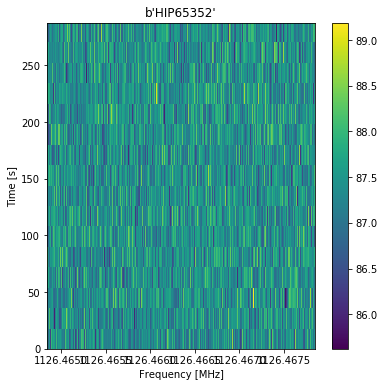

In [9]:
filterbank_head = Waterfall('D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', load_data=False)

f_range=0.003
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0
t_stop = 16
i=0

noise_slice = Waterfall('D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)

plt.figure(figsize=(6,6))
noise_slice.plot_waterfall()

noise_baseline = np.max(noise_slice.data)

print('Noise baseline: ' + str(noise_baseline))

Find regions,

In [64]:
f_range=0.3 #larger for ROI search
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0
t_stop = 16
i=0
noise_cutoff = 10
RsOI = []
max_signal = []
signal = []

while (f_stop <= filterbank_head.container.f_stop):
    ROI = 'No'
    filterbank = Waterfall('D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)
    data_temp = filterbank.data
    max_temp = np.max(data_temp)
    mean_signal = np.mean(data_temp)
    if max_temp > noise_baseline*noise_cutoff:
        RsOI.append(f_start)
        ROI = 'Yes'
        
    #min_temp = np.min(data_temp)
    #if min_temp < min_overall:
    #    min_overall = min_temp
        
    max_signal.append(max_temp)    
    signal.append(mean_signal)
    
    f_start = f_start + f_range
    f_stop = f_stop + f_range
    print("Just looked at " + str(f_start) + ". RIO? ... " + ROI)
    i=i+1
    
#print('The minimum power is ' + str(min_overall))
#print('The maximum power is ' + str(max_overall))

Just looked at 1126.76484375. RIO? ... No
Just looked at 1127.06484375. RIO? ... No
Just looked at 1127.3648437499999. RIO? ... No
Just looked at 1127.6648437499998. RIO? ... No
Just looked at 1127.9648437499998. RIO? ... Yes
Just looked at 1128.2648437499997. RIO? ... No
Just looked at 1128.5648437499997. RIO? ... No
Just looked at 1128.8648437499996. RIO? ... No
Just looked at 1129.1648437499996. RIO? ... No
Just looked at 1129.4648437499995. RIO? ... No
Just looked at 1129.7648437499995. RIO? ... No
Just looked at 1130.0648437499995. RIO? ... No
Just looked at 1130.3648437499994. RIO? ... No
Just looked at 1130.6648437499994. RIO? ... No
Just looked at 1130.9648437499993. RIO? ... Yes
Just looked at 1131.2648437499993. RIO? ... No
Just looked at 1131.5648437499992. RIO? ... No
Just looked at 1131.8648437499992. RIO? ... No
Just looked at 1132.1648437499991. RIO? ... No
Just looked at 1132.464843749999. RIO? ... No
Just looked at 1132.764843749999. RIO? ... No
Just looked at 1133.064

Just looked at 1179.564843749992. RIO? ... No
Just looked at 1179.864843749992. RIO? ... No
Just looked at 1180.1648437499919. RIO? ... No
Just looked at 1180.4648437499918. RIO? ... No
Just looked at 1180.7648437499918. RIO? ... No
Just looked at 1181.0648437499917. RIO? ... No
Just looked at 1181.3648437499917. RIO? ... No
Just looked at 1181.6648437499916. RIO? ... No
Just looked at 1181.9648437499916. RIO? ... No
Just looked at 1182.2648437499915. RIO? ... No
Just looked at 1182.5648437499915. RIO? ... No
Just looked at 1182.8648437499915. RIO? ... No
Just looked at 1183.1648437499914. RIO? ... No
Just looked at 1183.4648437499914. RIO? ... Yes
Just looked at 1183.7648437499913. RIO? ... No
Just looked at 1184.0648437499913. RIO? ... No
Just looked at 1184.3648437499912. RIO? ... No
Just looked at 1184.6648437499912. RIO? ... No
Just looked at 1184.9648437499911. RIO? ... No
Just looked at 1185.264843749991. RIO? ... No
Just looked at 1185.564843749991. RIO? ... No
Just looked at 1

Just looked at 1232.064843749984. RIO? ... No
Just looked at 1232.364843749984. RIO? ... No
Just looked at 1232.664843749984. RIO? ... No
Just looked at 1232.9648437499839. RIO? ... No
Just looked at 1233.2648437499838. RIO? ... No
Just looked at 1233.5648437499838. RIO? ... No
Just looked at 1233.8648437499837. RIO? ... No
Just looked at 1234.1648437499837. RIO? ... No
Just looked at 1234.4648437499836. RIO? ... No
Just looked at 1234.7648437499836. RIO? ... No
Just looked at 1235.0648437499835. RIO? ... No
Just looked at 1235.3648437499835. RIO? ... No
Just looked at 1235.6648437499834. RIO? ... No
Just looked at 1235.9648437499834. RIO? ... No
Just looked at 1236.2648437499834. RIO? ... No
Just looked at 1236.5648437499833. RIO? ... No
Just looked at 1236.8648437499833. RIO? ... No
Just looked at 1237.1648437499832. RIO? ... No
Just looked at 1237.4648437499832. RIO? ... No
Just looked at 1237.7648437499831. RIO? ... No
Just looked at 1238.064843749983. RIO? ... No
Just looked at 12

Just looked at 1284.864843749976. RIO? ... No
Just looked at 1285.164843749976. RIO? ... No
Just looked at 1285.464843749976. RIO? ... No
Just looked at 1285.7648437499759. RIO? ... No
Just looked at 1286.0648437499758. RIO? ... No
Just looked at 1286.3648437499758. RIO? ... No
Just looked at 1286.6648437499757. RIO? ... No
Just looked at 1286.9648437499757. RIO? ... No
Just looked at 1287.2648437499756. RIO? ... No
Just looked at 1287.5648437499756. RIO? ... No
Just looked at 1287.8648437499755. RIO? ... No
Just looked at 1288.1648437499755. RIO? ... No
Just looked at 1288.4648437499754. RIO? ... No
Just looked at 1288.7648437499754. RIO? ... No
Just looked at 1289.0648437499754. RIO? ... No
Just looked at 1289.3648437499753. RIO? ... No
Just looked at 1289.6648437499753. RIO? ... No
Just looked at 1289.9648437499752. RIO? ... No
Just looked at 1290.2648437499752. RIO? ... No
Just looked at 1290.5648437499751. RIO? ... No
Just looked at 1290.864843749975. RIO? ... No
Just looked at 12

Just looked at 1337.964843749968. RIO? ... No
Just looked at 1338.264843749968. RIO? ... No
Just looked at 1338.5648437499678. RIO? ... No
Just looked at 1338.8648437499678. RIO? ... No
Just looked at 1339.1648437499678. RIO? ... No
Just looked at 1339.4648437499677. RIO? ... No
Just looked at 1339.7648437499677. RIO? ... No
Just looked at 1340.0648437499676. RIO? ... No
Just looked at 1340.3648437499676. RIO? ... No
Just looked at 1340.6648437499675. RIO? ... No
Just looked at 1340.9648437499675. RIO? ... No
Just looked at 1341.2648437499674. RIO? ... No
Just looked at 1341.5648437499674. RIO? ... No
Just looked at 1341.8648437499673. RIO? ... No
Just looked at 1342.1648437499673. RIO? ... No
Just looked at 1342.4648437499673. RIO? ... No
Just looked at 1342.7648437499672. RIO? ... No
Just looked at 1343.0648437499672. RIO? ... No
Just looked at 1343.3648437499671. RIO? ... No
Just looked at 1343.664843749967. RIO? ... No
Just looked at 1343.964843749967. RIO? ... No
Just looked at 13

Just looked at 1390.46484374996. RIO? ... No
Just looked at 1390.76484374996. RIO? ... No
Just looked at 1391.06484374996. RIO? ... No
Just looked at 1391.3648437499598. RIO? ... No
Just looked at 1391.6648437499598. RIO? ... Yes
Just looked at 1391.9648437499598. RIO? ... No
Just looked at 1392.2648437499597. RIO? ... No
Just looked at 1392.5648437499597. RIO? ... No
Just looked at 1392.8648437499596. RIO? ... No
Just looked at 1393.1648437499596. RIO? ... No
Just looked at 1393.4648437499595. RIO? ... No
Just looked at 1393.7648437499595. RIO? ... No
Just looked at 1394.0648437499594. RIO? ... No
Just looked at 1394.3648437499594. RIO? ... No
Just looked at 1394.6648437499593. RIO? ... Yes
Just looked at 1394.9648437499593. RIO? ... No
Just looked at 1395.2648437499593. RIO? ... No
Just looked at 1395.5648437499592. RIO? ... No
Just looked at 1395.8648437499592. RIO? ... No
Just looked at 1396.1648437499591. RIO? ... No
Just looked at 1396.464843749959. RIO? ... No
Just looked at 139

Just looked at 1443.264843749952. RIO? ... Yes
Just looked at 1443.564843749952. RIO? ... No
Just looked at 1443.864843749952. RIO? ... Yes
Just looked at 1444.1648437499518. RIO? ... No
Just looked at 1444.4648437499518. RIO? ... No
Just looked at 1444.7648437499518. RIO? ... No
Just looked at 1445.0648437499517. RIO? ... No
Just looked at 1445.3648437499517. RIO? ... No
Just looked at 1445.6648437499516. RIO? ... Yes
Just looked at 1445.9648437499516. RIO? ... No
Just looked at 1446.2648437499515. RIO? ... No
Just looked at 1446.5648437499515. RIO? ... No
Just looked at 1446.8648437499514. RIO? ... Yes
Just looked at 1447.1648437499514. RIO? ... No
Just looked at 1447.4648437499513. RIO? ... Yes
Just looked at 1447.7648437499513. RIO? ... No
Just looked at 1448.0648437499513. RIO? ... No
Just looked at 1448.3648437499512. RIO? ... No
Just looked at 1448.6648437499512. RIO? ... No
Just looked at 1448.9648437499511. RIO? ... No
Just looked at 1449.264843749951. RIO? ... No
Just looked 

Just looked at 1496.064843749944. RIO? ... No
Just looked at 1496.364843749944. RIO? ... No
Just looked at 1496.6648437499439. RIO? ... No
Just looked at 1496.9648437499438. RIO? ... No
Just looked at 1497.2648437499438. RIO? ... No
Just looked at 1497.5648437499437. RIO? ... No
Just looked at 1497.8648437499437. RIO? ... No
Just looked at 1498.1648437499437. RIO? ... No
Just looked at 1498.4648437499436. RIO? ... No
Just looked at 1498.7648437499436. RIO? ... No
Just looked at 1499.0648437499435. RIO? ... No
Just looked at 1499.3648437499435. RIO? ... No
Just looked at 1499.6648437499434. RIO? ... No
Just looked at 1499.9648437499434. RIO? ... No
Just looked at 1500.2648437499433. RIO? ... Yes
Just looked at 1500.5648437499433. RIO? ... No
Just looked at 1500.8648437499432. RIO? ... No
Just looked at 1501.1648437499432. RIO? ... No
Just looked at 1501.4648437499432. RIO? ... No
Just looked at 1501.764843749943. RIO? ... No
Just looked at 1502.064843749943. RIO? ... No
Just looked at 1

Just looked at 1548.264843749936. RIO? ... Yes
Just looked at 1548.564843749936. RIO? ... Yes
Just looked at 1548.864843749936. RIO? ... Yes
Just looked at 1549.164843749936. RIO? ... Yes
Just looked at 1549.4648437499359. RIO? ... Yes
Just looked at 1549.7648437499358. RIO? ... Yes
Just looked at 1550.0648437499358. RIO? ... Yes
Just looked at 1550.3648437499357. RIO? ... Yes
Just looked at 1550.6648437499357. RIO? ... Yes
Just looked at 1550.9648437499357. RIO? ... Yes
Just looked at 1551.2648437499356. RIO? ... Yes
Just looked at 1551.5648437499356. RIO? ... Yes
Just looked at 1551.8648437499355. RIO? ... No
Just looked at 1552.1648437499355. RIO? ... Yes
Just looked at 1552.4648437499354. RIO? ... Yes
Just looked at 1552.7648437499354. RIO? ... Yes
Just looked at 1553.0648437499353. RIO? ... No
Just looked at 1553.3648437499353. RIO? ... Yes
Just looked at 1553.6648437499352. RIO? ... No
Just looked at 1553.9648437499352. RIO? ... Yes
Just looked at 1554.2648437499352. RIO? ... Yes

Just looked at 1600.764843749928. RIO? ... No
Just looked at 1601.064843749928. RIO? ... No
Just looked at 1601.364843749928. RIO? ... No
Just looked at 1601.664843749928. RIO? ... No
Just looked at 1601.964843749928. RIO? ... No
Just looked at 1602.2648437499279. RIO? ... No
Just looked at 1602.5648437499278. RIO? ... No
Just looked at 1602.8648437499278. RIO? ... Yes
Just looked at 1603.1648437499277. RIO? ... No
Just looked at 1603.4648437499277. RIO? ... No
Just looked at 1603.7648437499276. RIO? ... No
Just looked at 1604.0648437499276. RIO? ... No
Just looked at 1604.3648437499276. RIO? ... No
Just looked at 1604.6648437499275. RIO? ... No
Just looked at 1604.9648437499275. RIO? ... No
Just looked at 1605.2648437499274. RIO? ... Yes
Just looked at 1605.5648437499274. RIO? ... Yes
Just looked at 1605.8648437499273. RIO? ... Yes
Just looked at 1606.1648437499273. RIO? ... No
Just looked at 1606.4648437499272. RIO? ... No
Just looked at 1606.7648437499272. RIO? ... No
Just looked at

Just looked at 1653.56484374992. RIO? ... No
Just looked at 1653.86484374992. RIO? ... No
Just looked at 1654.16484374992. RIO? ... No
Just looked at 1654.46484374992. RIO? ... No
Just looked at 1654.76484374992. RIO? ... No
Just looked at 1655.0648437499199. RIO? ... No
Just looked at 1655.3648437499198. RIO? ... Yes
Just looked at 1655.6648437499198. RIO? ... No
Just looked at 1655.9648437499197. RIO? ... No
Just looked at 1656.2648437499197. RIO? ... No
Just looked at 1656.5648437499196. RIO? ... No
Just looked at 1656.8648437499196. RIO? ... No
Just looked at 1657.1648437499196. RIO? ... No
Just looked at 1657.4648437499195. RIO? ... No
Just looked at 1657.7648437499195. RIO? ... No
Just looked at 1658.0648437499194. RIO? ... No
Just looked at 1658.3648437499194. RIO? ... No
Just looked at 1658.6648437499193. RIO? ... No
Just looked at 1658.9648437499193. RIO? ... No
Just looked at 1659.2648437499192. RIO? ... No
Just looked at 1659.5648437499192. RIO? ... No
Just looked at 1659.86

Just looked at 1706.0648437499121. RIO? ... No
Just looked at 1706.364843749912. RIO? ... No
Just looked at 1706.664843749912. RIO? ... No
Just looked at 1706.964843749912. RIO? ... No
Just looked at 1707.264843749912. RIO? ... No
Just looked at 1707.564843749912. RIO? ... No
Just looked at 1707.8648437499119. RIO? ... No
Just looked at 1708.1648437499118. RIO? ... Yes
Just looked at 1708.4648437499118. RIO? ... No
Just looked at 1708.7648437499117. RIO? ... No
Just looked at 1709.0648437499117. RIO? ... No
Just looked at 1709.3648437499116. RIO? ... No
Just looked at 1709.6648437499116. RIO? ... No
Just looked at 1709.9648437499116. RIO? ... No
Just looked at 1710.2648437499115. RIO? ... No
Just looked at 1710.5648437499115. RIO? ... No
Just looked at 1710.8648437499114. RIO? ... No
Just looked at 1711.1648437499114. RIO? ... Yes
Just looked at 1711.4648437499113. RIO? ... No
Just looked at 1711.7648437499113. RIO? ... No
Just looked at 1712.0648437499112. RIO? ... No
Just looked at 1

Just looked at 1759.164843749904. RIO? ... No
Just looked at 1759.464843749904. RIO? ... No
Just looked at 1759.764843749904. RIO? ... No
Just looked at 1760.064843749904. RIO? ... No
Just looked at 1760.364843749904. RIO? ... No
Just looked at 1760.6648437499039. RIO? ... No
Just looked at 1760.9648437499038. RIO? ... Yes
Just looked at 1761.2648437499038. RIO? ... No
Just looked at 1761.5648437499037. RIO? ... No
Just looked at 1761.8648437499037. RIO? ... No
Just looked at 1762.1648437499036. RIO? ... No
Just looked at 1762.4648437499036. RIO? ... No
Just looked at 1762.7648437499035. RIO? ... No
Just looked at 1763.0648437499035. RIO? ... No
Just looked at 1763.3648437499035. RIO? ... No
Just looked at 1763.6648437499034. RIO? ... No
Just looked at 1763.9648437499034. RIO? ... Yes
Just looked at 1764.2648437499033. RIO? ... No
Just looked at 1764.5648437499033. RIO? ... No
Just looked at 1764.8648437499032. RIO? ... No
Just looked at 1765.1648437499032. RIO? ... No
Just looked at 1

Just looked at 1812.264843749896. RIO? ... No
Just looked at 1812.564843749896. RIO? ... No
Just looked at 1812.864843749896. RIO? ... No
Just looked at 1813.164843749896. RIO? ... No
Just looked at 1813.4648437498959. RIO? ... No
Just looked at 1813.7648437498958. RIO? ... No
Just looked at 1814.0648437498958. RIO? ... No
Just looked at 1814.3648437498957. RIO? ... No
Just looked at 1814.6648437498957. RIO? ... No
Just looked at 1814.9648437498956. RIO? ... No
Just looked at 1815.2648437498956. RIO? ... No
Just looked at 1815.5648437498955. RIO? ... No
Just looked at 1815.8648437498955. RIO? ... No
Just looked at 1816.1648437498955. RIO? ... No
Just looked at 1816.4648437498954. RIO? ... No
Just looked at 1816.7648437498954. RIO? ... No
Just looked at 1817.0648437498953. RIO? ... No
Just looked at 1817.3648437498953. RIO? ... No
Just looked at 1817.6648437498952. RIO? ... No
Just looked at 1817.9648437498952. RIO? ... No
Just looked at 1818.2648437498951. RIO? ... No
Just looked at 18

Just looked at 1865.364843749888. RIO? ... No
Just looked at 1865.664843749888. RIO? ... No
Just looked at 1865.964843749888. RIO? ... No
Just looked at 1866.2648437498879. RIO? ... No
Just looked at 1866.5648437498878. RIO? ... No
Just looked at 1866.8648437498878. RIO? ... No
Just looked at 1867.1648437498877. RIO? ... No
Just looked at 1867.4648437498877. RIO? ... No
Just looked at 1867.7648437498876. RIO? ... No
Just looked at 1868.0648437498876. RIO? ... No
Just looked at 1868.3648437498875. RIO? ... No
Just looked at 1868.6648437498875. RIO? ... No
Just looked at 1868.9648437498875. RIO? ... No
Just looked at 1869.2648437498874. RIO? ... Yes
Just looked at 1869.5648437498874. RIO? ... No
Just looked at 1869.8648437498873. RIO? ... No
Just looked at 1870.1648437498873. RIO? ... No
Just looked at 1870.4648437498872. RIO? ... No
Just looked at 1870.7648437498872. RIO? ... No
Just looked at 1871.0648437498871. RIO? ... No
Just looked at 1871.364843749887. RIO? ... No
Just looked at 1

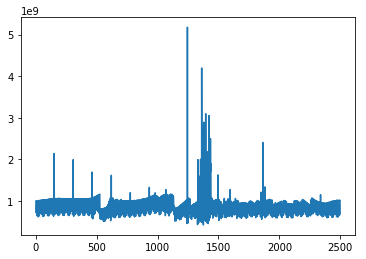

In [65]:
plt.plot(signal)

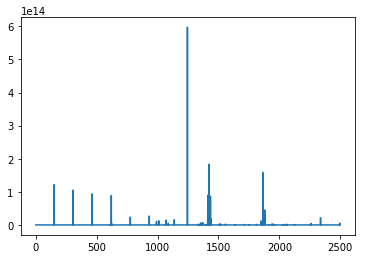

In [66]:
plt.plot(max_signal)

In [67]:
len(RsOI)

316

In [ ]:
#RsOI_min = RsOI.copy()
#RsOI_max = RsOI.copy()

#for i in range(0,len(RsOI_min)-1):
#    RsOI_max[i] = RsOI_min[i+1]

In [ ]:
#for i in range(0,len(RsOI_min)):
#    print("Between " + str(RsOI_min[i]) + " and " + str(RsOI_max[i]))
#    print((1189.77 > RsOI_min[i]) & (1189.77 < RsOI_max[i]))

### Function to plot spectrograms

In [42]:
#https://github.com/UCBerkeleySETI/blimpy/blob/master/blimpy/utils.py

def rebin(d, n_x, n_y=None):
    """ Rebin data by averaging bins together
    Args:
    d (np.array): data
    n_x (int): number of bins in x dir to rebin into one
    n_y (int): number of bins in y dir to rebin into one
    Returns:
    d: rebinned data with shape (n_x, n_y)
    """

    if d.ndim == 2:
        if n_y is None:
            n_y = 1
        if n_x is None:
            n_x = 1
        d = d[:int(d.shape[0] // n_x) * n_x, :int(d.shape[1] // n_y) * n_y]
        d = d.reshape((d.shape[0] // n_x, n_x, d.shape[1] // n_y, n_y))
        d = d.mean(axis=3)
        d = d.mean(axis=1)
    elif d.ndim == 1:
        d = d[:int(d.shape[0] // n_x) * n_x]
        d = d.reshape((d.shape[0] // n_x, n_x))
        d = d.mean(axis=1)
    else:
        raise RuntimeError("Only NDIM <= 2 supported")
    
    return(d)

In [60]:
#HIP65352 (Example Enrique data)
chosen_file = 'D:/repos_personal/other/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5'
filterbank_head = Waterfall(chosen_file, load_data=False)

f_range=0.003
#f_start = filterbank_head.container.f_start
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0 
t_stop = 16
i=0
MAX_IMSHOW_POINTS = (8192, 4096)

blimpy.file_wrapper INFO     Skipping loading data ...


In [61]:
#How Enrique plots his waterfall images,
#https://github.com/jeenriquez/Lband_seti/blob/master/analysis/plot_candidates.py
#i=1
#for i in range(0,len(RsOI_min)):
#while (f_stop <= filterbank_head.container.f_stop):
    #if (f_start >= RsOI_min[i]) & (f_start <= RsOI_max[i]) :
    
for i in range(0,len(RsOI)):
    f_start = RsOI[i]
    f_stop = f_start + 0.3
    filterbank = Waterfall(chosen_file, f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)
    plot_f, data_temp = filterbank.grab_data()

    if filterbank.header[b'foff'] < 0:
            data_temp = data_temp[..., ::-1] # Reverse data
            plot_f = plot_f[::-1]

    dec_fac_x, dec_fac_y = 1, 1

    if data_temp.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = int(data_temp.shape[0] / MAX_IMSHOW_POINTS[0])

    if data_temp.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y =  int(data_temp.shape[1] /  MAX_IMSHOW_POINTS[1])

    data_temp = rebin(data_temp, dec_fac_x, dec_fac_y)

    extent = filterbank._calc_extent(plot_f=plot_f,plot_t=filterbank.timestamps)

    A1_avg = np.mean(data_temp)
    A1_max = data_temp.max()
    A1_std = np.std(data_temp)
    
    plt.figure(figsize=(12,12))
    plt.imshow(data_temp,
    aspect='auto',
    origin='lower',
    rasterized=True,
    interpolation='none',
    extent=extent,
    cmap='viridis')

    #plt.colorbar()
    plt.clim(vmin=A1_avg,vmax=A1_avg+10.*A1_std);
    #plt.clim(vmin=1e3,vmax=3.5e9);
    #plt.xlabel("Frequency [MHz]")
    #plt.ylabel("Time [s]")

    plt.axis('off') #Remove axes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0) #Remove margins

    plt.savefig('images/outfile_' + str(f_start) + '.jpg')

    plt.clf() #Reset plots
    
    print(str(f_start) + ' (going up to ' + str(filterbank_head.container.f_stop) + ')')
    f_start = f_start + f_range
    f_stop = f_stop + f_range
    i=i+1

1127.6648437499998 (going up to 1876.46484375)
1130.6648437499994 (going up to 1876.46484375)
1133.664843749999 (going up to 1876.46484375)
1145.3648437499971 (going up to 1876.46484375)
1145.964843749997 (going up to 1876.46484375)
1148.3648437499967 (going up to 1876.46484375)
1165.764843749994 (going up to 1876.46484375)
1169.9648437499934 (going up to 1876.46484375)
1171.7648437499931 (going up to 1876.46484375)
1183.1648437499914 (going up to 1876.46484375)
1195.1648437499896 (going up to 1876.46484375)
1199.9648437499889 (going up to 1876.46484375)
1203.8648437499883 (going up to 1876.46484375)
1204.1648437499882 (going up to 1876.46484375)
1206.8648437499878 (going up to 1876.46484375)
1209.8648437499874 (going up to 1876.46484375)
1212.864843749987 (going up to 1876.46484375)
1215.5648437499865 (going up to 1876.46484375)
1217.9648437499861 (going up to 1876.46484375)
1218.564843749986 (going up to 1876.46484375)
1221.5648437499856 (going up to 1876.46484375)
1224.5648437499851

1556.3648437499348 (going up to 1876.46484375)
1556.6648437499348 (going up to 1876.46484375)
1556.9648437499347 (going up to 1876.46484375)
1557.2648437499347 (going up to 1876.46484375)
1557.5648437499347 (going up to 1876.46484375)
1557.8648437499346 (going up to 1876.46484375)
1558.1648437499346 (going up to 1876.46484375)
1558.4648437499345 (going up to 1876.46484375)
1558.7648437499345 (going up to 1876.46484375)
1559.3648437499344 (going up to 1876.46484375)
1559.6648437499343 (going up to 1876.46484375)
1559.9648437499343 (going up to 1876.46484375)
1560.5648437499342 (going up to 1876.46484375)
1560.8648437499342 (going up to 1876.46484375)
1564.1648437499337 (going up to 1876.46484375)
1565.0648437499335 (going up to 1876.46484375)
1567.1648437499332 (going up to 1876.46484375)
1571.6648437499325 (going up to 1876.46484375)
1573.1648437499323 (going up to 1876.46484375)
1573.4648437499322 (going up to 1876.46484375)
1573.7648437499322 (going up to 1876.46484375)
1574.06484374

KeyboardInterrupt: 

#### Combine all images

In [113]:
list_im = os.listdir('images/')
print(list_im)

['outfile_0.jpg', 'outfile_1.jpg', 'outfile_10.jpg', 'outfile_11.jpg', 'outfile_12.jpg', 'outfile_13.jpg', 'outfile_14.jpg', 'outfile_15.jpg', 'outfile_16.jpg', 'outfile_17.jpg', 'outfile_18.jpg', 'outfile_19.jpg', 'outfile_2.jpg', 'outfile_20.jpg', 'outfile_21.jpg', 'outfile_22.jpg', 'outfile_23.jpg', 'outfile_24.jpg', 'outfile_25.jpg', 'outfile_26.jpg', 'outfile_27.jpg', 'outfile_28.jpg', 'outfile_29.jpg', 'outfile_3.jpg', 'outfile_30.jpg', 'outfile_31.jpg', 'outfile_32.jpg', 'outfile_33.jpg', 'outfile_34.jpg', 'outfile_35.jpg', 'outfile_36.jpg', 'outfile_37.jpg', 'outfile_38.jpg', 'outfile_39.jpg', 'outfile_4.jpg', 'outfile_40.jpg', 'outfile_41.jpg', 'outfile_42.jpg', 'outfile_43.jpg', 'outfile_44.jpg', 'outfile_45.jpg', 'outfile_46.jpg', 'outfile_47.jpg', 'outfile_48.jpg', 'outfile_49.jpg', 'outfile_5.jpg', 'outfile_50.jpg', 'outfile_51.jpg', 'outfile_52.jpg', 'outfile_53.jpg', 'outfile_54.jpg', 'outfile_55.jpg', 'outfile_56.jpg', 'outfile_57.jpg', 'outfile_58.jpg', 'outfile_59.jpg

In [114]:
imgs = [PIL.Image.open('images/' + i) for i in list_im]

min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]
imgs_comb = np.hstack((np.asarray( i.resize(min_shape) ) for i in imgs))
imgs_comb = misc.imresize(imgs_comb, (2000, 3000)) #Resize the massive image!

imgs_comb = PIL.Image.fromarray(imgs_comb)
imgs_comb.save('HIP65352_A_1.jpg')

#### Misc

extracting integration 0...


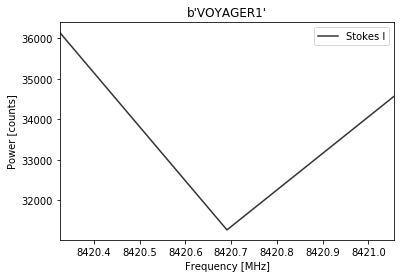

In [49]:
filterbank.plot_spectrum()

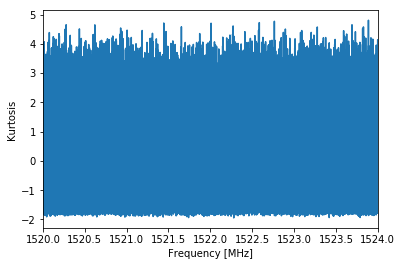

In [8]:
filterbank.plot_kurtosis()

averaging along time axis...


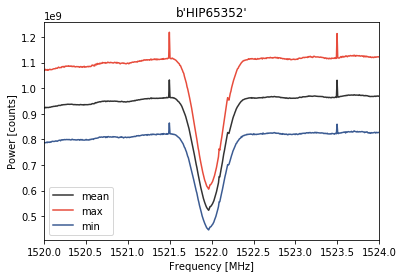

In [9]:
filterbank.plot_spectrum_min_max()

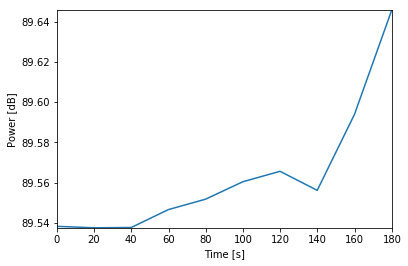

In [10]:
filterbank.plot_time_series()